<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [4]:
# your code goes here
#importing libraries for the  Visualization

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Plot the histogram for the column `ConvertedComp`.


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


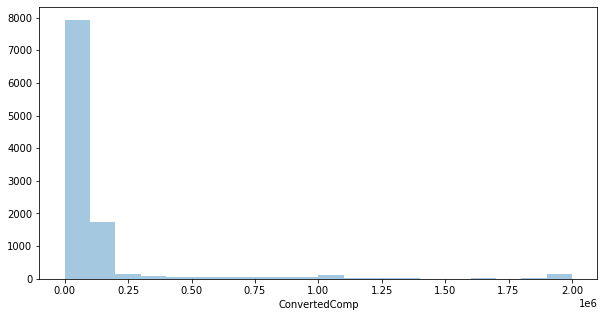

In [10]:
# your code goes here
plt.figure(figsize=(10,5))
sns.distplot(a=df["ConvertedComp"],bins=20, kde=False)
plt.show()

What is the median of the column `ConvertedComp`?


In [13]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [19]:
# your code goes here
print('Unique values in Gender are ',df['Gender'].nunique())
print('Vaues Count of gender row are \n',df['Gender'].value_counts())
print('Responders indentified as Man are \n', df['Gender'].eq('Man').sum())

Unique values in Gender are  7
Vaues Count of gender row are 
 Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64
Responders indentified as Man are 
 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [36]:
# your code goes here 
df["ConvertedComp"].median()
print('Responders indentified as Woman are \n', df[df['Gender'].eq('Woman')]['ConvertedComp'].median())

Responders indentified as Woman are 
 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [37]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


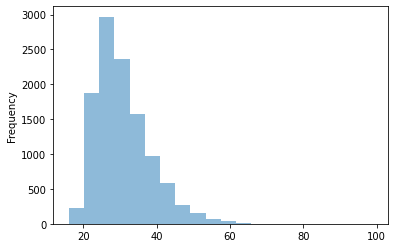

In [38]:
# your code goes here
df['Age'].plot.hist(bins=20, alpha=0.5)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


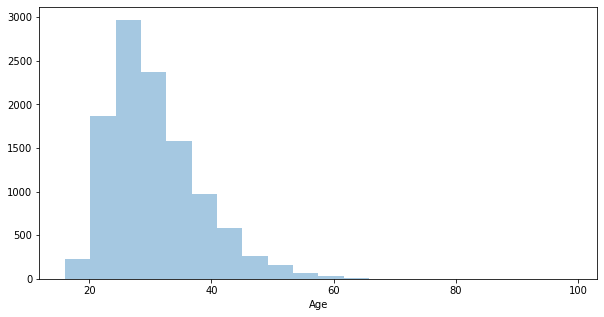

In [39]:
plt.figure(figsize=(10,5))
sns.distplot(a=df["Age"],bins=20, kde=False)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


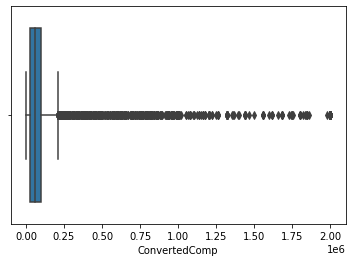

In [40]:
# your code goes here
sns.boxplot(x=df['ConvertedComp'])
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [45]:
# your code goes here
df['ConvertedComp'].describe()

Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)
IQR = Q3-Q1
print('The Inter Quartile range of is', IQR)

The Inter Quartile range of is 73132.0


Find out the upper and lower bounds.


In [49]:
# your code goes here
min_bounds = df['ConvertedComp'].min()
max_bounds = df['ConvertedComp'].max()
print('The upper and lower bounds are ',max_bounds, 'and ', min_bounds, 'respectively..')

The upper and lower bounds are  2000000.0 and  0.0 respectively..


Identify how many outliers are there in the `ConvertedComp` column.


In [52]:
# your code goes here
Outliers_below = df['ConvertedComp'].lt(Q1-1.5*IQR).sum()
Outliers_above = df['ConvertedComp'].gt(Q3+1.5*IQR).sum()
Median_Outiers = df['ConvertedComp'].median()
Median_with_outliers_removed= df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]['ConvertedComp'].median()
Mean_outliers_removed = df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]['ConvertedComp'].mean()
print('Outliers Below: ', Outliers_below)
print('Outliers Above: ', Outliers_above)
print('Median Outliers: ', Median_Outiers)
print('Median with outliers removed: ', Median_with_outliers_removed)
print('Mean with Outliers removed: ',Mean_outliers_removed)

Outliers Below:  0
Outliers Above:  879
Median Outliers:  57745.0
Median with outliers removed:  52704.0
Mean with Outliers removed:  59883.20838915799


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [54]:
# your code goes here
RemoveConvertedcomp = df[~(df["ConvertedComp"] > (Q3 + 1.5 * IQR))]
RemoveConvertedcomp.head()


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy
5,19,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Brazil,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,31.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina,Yes,Too long,Easy


In [55]:
RemoveConvertedcomp.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,10519.000000,9.710000e+03,9703.000000,10402.000000,8277.000000,10250.000000
mean,12488.961023,7.243963e+05,59883.208389,41.895813,4.809352,30.647298
std,7235.797316,7.184433e+06,43394.336755,24.301665,4.636411,7.352928
min,4.000000,0.000000e+00,0.000000,3.000000,0.000000,16.000000
25%,6257.500000,2.000000e+04,24060.000000,40.000000,2.000000,25.000000
50%,12483.000000,6.300000e+04,52704.000000,40.000000,4.000000,29.000000
75%,18789.500000,1.150000e+05,85574.500000,43.000000,5.000000,34.000000
max,25142.000000,3.900000e+08,209356.000000,1012.000000,99.000000,99.000000


In [57]:
df.shape

(11398, 85)

In [62]:

#print(df['ConvertedComp'].gt(Q3 + 1.5*IQR).shape)
df1 = df[df['ConvertedComp'].le(Q3 + 1.5*IQR)]
print('total number in new dataset:',df1.shape[0])
df2=df[df['ConvertedComp'].gt(Q3 + 1.5*IQR)]
print('total number of outliers removed:',df2.shape[0])
df3 = df[df['ConvertedComp'].isnull()]
print('total number of nulls removed:',df3.shape[0])
print('total of outliers + inliers + nulls:', (9703 + 879 + 816))

total number in new dataset: 9703
total number of outliers removed: 879
total number of nulls removed: 816
total of outliers + inliers + nulls: 11398


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [63]:
# your code goes here
df.corr()['Age']

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
